# Generalized Monty Hall
The Monty Hall game presents a scenario where switching ones random decision is valuable. Let's study a generalized version of this problem. First, let's define a class to represent the game state:

In [1]:
import random 

class MontyHallGame():
    '''An object that represents a Monty Hall Game with N goats and k cars
    '''
    
    def __init__(self, N, k):
        '''Constructor, where N is the number of goats and K is the number of 
           cars.
        '''
        
        self.doors = ['goat']*N + ['car']*k
        
        #variable representing your current choice
        self.choice = None
        
        #shuffle the objects behind the doors
        random.shuffle(self.doors)
    
    
    def pick(self):
        '''Function to pick the initial door
        '''
        self.choice = 0 #pick arbitrarily
    
    
    def reveal(self):
        '''Function to reveal a goat remaining doors
        '''
        goat_doors = [door_i \
                      for door_i, value in enumerate(self.doors) \
                      if (value == 'goat') and (door_i != self.choice)]
        
        if len(goat_doors) >= 1:
            return random.choice(goat_doors)
        else:
            return None
    
    def switch(self, rev):
        '''Function to switch the pick uniformly at random 
           to the remaining doors
        '''
        
        rem_doors = [door_i \
                      for door_i, _ in enumerate(self.doors) \
                      if (door_i  != rev) and (door_i != self.choice)]
        
        self.choice = random.choice(rem_doors)
    
    def win(self):
        return (self.doors[self.choice] == 'car')    

We can verify that this simulator works by trying the familar 2 goats, 1 car game:

In [3]:
sum = 0
for i in range(1000):
    game = MontyHallGame(2,1)
    game.pick()
    reveal = game.reveal()
    game.switch(reveal)
    
    sum += game.win()
    
print('Winning Rate After Switching', sum/1000)

Winning Rate After Switching 0.694


We can write a wrapper function that compares switching v.s. not switching as a strategy:

In [5]:
def compare(N, k, trials=1000):
    '''For different instantiations of the monty hall game
       simulate switching vs. staying.
    '''
    sum_switch = 0
    sum_stay = 0
    
    for i in range(10000):
        game = MontyHallGame(N,k)
        game.pick()
        
        sum_stay += game.win() #how valuable it is to stay
        
        reveal = game.reveal()
        game.switch(reveal)

        sum_switch += game.win() #how valuable it is to switch
    
    return sum_switch/sum_stay

<IPython.core.display.Javascript object>


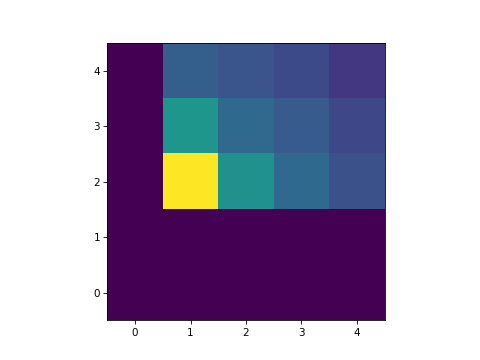

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

data = np.zeros((5,5))

for goats in range(2,5):
    for cars in range(1,5):
        data[goats, cars] = compare(goats, cars) - 1

plt.imshow(data, origin='lower')
#plt.xlim(2,10)
#plt.ylim(1,10)
#plt.show()